In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy

In [2]:
adata = scv.datasets.gastrulation_erythroid()

saving figure to file figure/erythroid_proportions.png


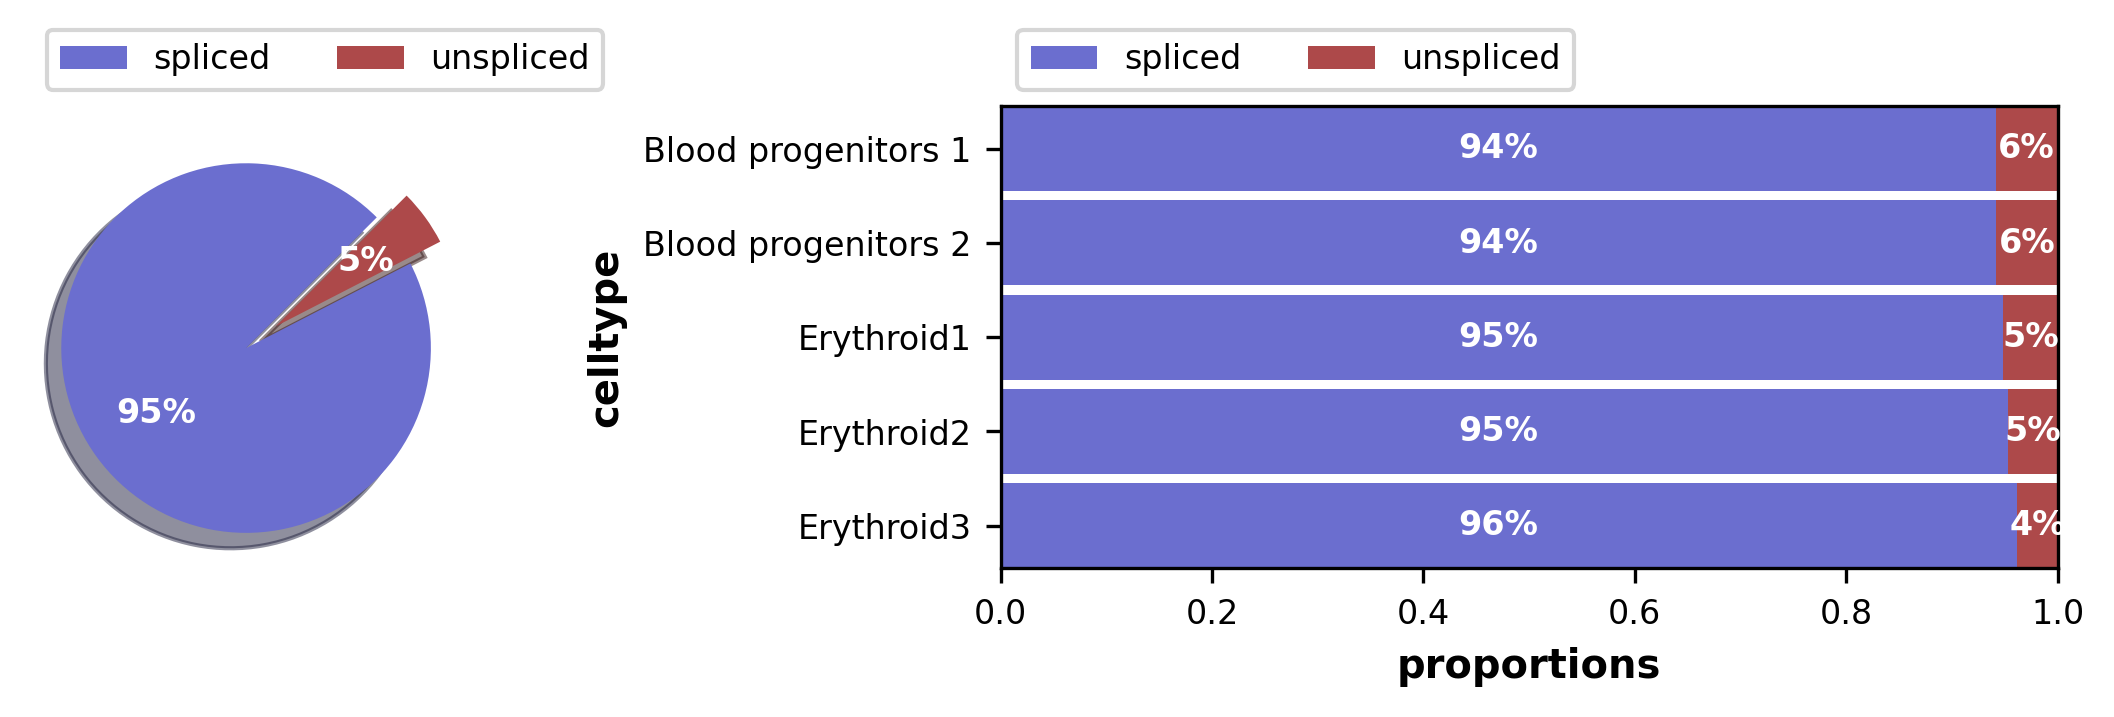

In [3]:
scv.pl.proportions(adata, groupby = "celltype", save = "figure/erythroid_proportions.png", dpi = 300, layers = ["spliced", "unspliced"])

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/home/tung/anaconda3/envs/dynamo/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.recover_dynamics(adata, n_jobs = 16)

recovering dynamics (using 16/24 cores)


  0%|          | 0/590 [00:00<?, ?gene/s]

    finished (0:01:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [6]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [10]:
scv.tl.latent_time(adata)

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [11]:
adata.write_h5ad("data/scvelo.h5ad")